In [11]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [13]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [14]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_bar_plot_for_model_selection

## Initialize Configs

In [15]:
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
EXPERIMENT_SESSION_UUID = '9750a063-e9d0-4d32-bdc6-5ba735602c1c'
SENSITIVE_ATTRS = ['male', 'race']
SENSITIVE_ATTR_FOR_INTERVENTION = 'race'
MODEL_NAMES = ['LogisticRegression']
# MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier', 'MLPClassifier']

In [16]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [17]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [18]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [19]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(12, 33)

In [20]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,male_priv_correct,male_priv_incorrect,overall,race_dis,race_dis_correct,race_dis_incorrect,race_priv,race_priv_correct,race_priv_incorrect,Test_Set_Index
0,Accuracy,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Law_School,200,OK,2024-01-03 23:48:09.133,9750a063-e9d0-4d32-bdc6-5ba735602c1c,Exp_iter_1,100,...,1.000000,0.000000,0.887115,0.709069,1.000000,0.000000,0.921857,1.000000,0.000000,0
1,F1,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Law_School,200,OK,2024-01-03 23:48:09.133,9750a063-e9d0-4d32-bdc6-5ba735602c1c,Exp_iter_1,100,...,1.000000,0.000000,0.939764,0.829773,1.000000,0.000000,0.959007,1.000000,0.000000,0
2,FNR,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Law_School,200,OK,2024-01-03 23:48:09.133,9750a063-e9d0-4d32-bdc6-5ba735602c1c,Exp_iter_1,100,...,0.000000,1.000000,0.005430,0.000000,0.000000,NaN,0.006247,0.000000,1.000000,0
3,FPR,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Law_School,200,OK,2024-01-03 23:48:09.133,9750a063-e9d0-4d32-bdc6-5ba735602c1c,Exp_iter_1,100,...,0.000000,1.000000,0.942953,1.000000,NaN,1.000000,0.902579,0.000000,1.000000,0
4,Jitter,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Law_School,200,OK,2024-01-03 23:48:09.133,9750a063-e9d0-4d32-bdc6-5ba735602c1c,Exp_iter_1,100,...,0.036407,0.109855,0.046261,0.092147,0.046341,0.203789,0.037308,0.035137,0.062911,0
5,Label_Stability,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Law_School,200,OK,2024-01-03 23:48:09.133,9750a063-e9d0-4d32-bdc6-5ba735602c1c,Exp_iter_1,100,...,0.960435,0.857662,0.946581,0.878375,0.939369,0.729717,0.959890,0.963184,0.921029,0
6,PPV,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Law_School,200,OK,2024-01-03 23:48:09.133,9750a063-e9d0-4d32-bdc6-5ba735602c1c,Exp_iter_1,100,...,1.000000,0.000000,0.890683,0.709069,1.000000,0.000000,0.926608,1.000000,0.000000,0
7,Positive-Rate,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Law_School,200,OK,2024-01-03 23:48:09.133,9750a063-e9d0-4d32-bdc6-5ba735602c1c,Exp_iter_1,100,...,1.000000,19.533333,1.116638,1.410299,1.000000,inf,1.072464,1.000000,12.600000,0
8,Sample_Size,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Law_School,200,OK,2024-01-03 23:48:09.133,9750a063-e9d0-4d32-bdc6-5ba735602c1c,Exp_iter_1,100,...,2577.000000,308.000000,5200.000000,849.000000,602.000000,247.000000,4351.000000,4011.000000,340.000000,0
9,Selection-Rate,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Law_School,200,OK,2024-01-03 23:48:09.133,9750a063-e9d0-4d32-bdc6-5ba735602c1c,Exp_iter_1,100,...,0.993015,0.951299,0.988654,1.000000,1.000000,1.000000,0.986440,0.991523,0.926471,0


In [21]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [22]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [23]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [24]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

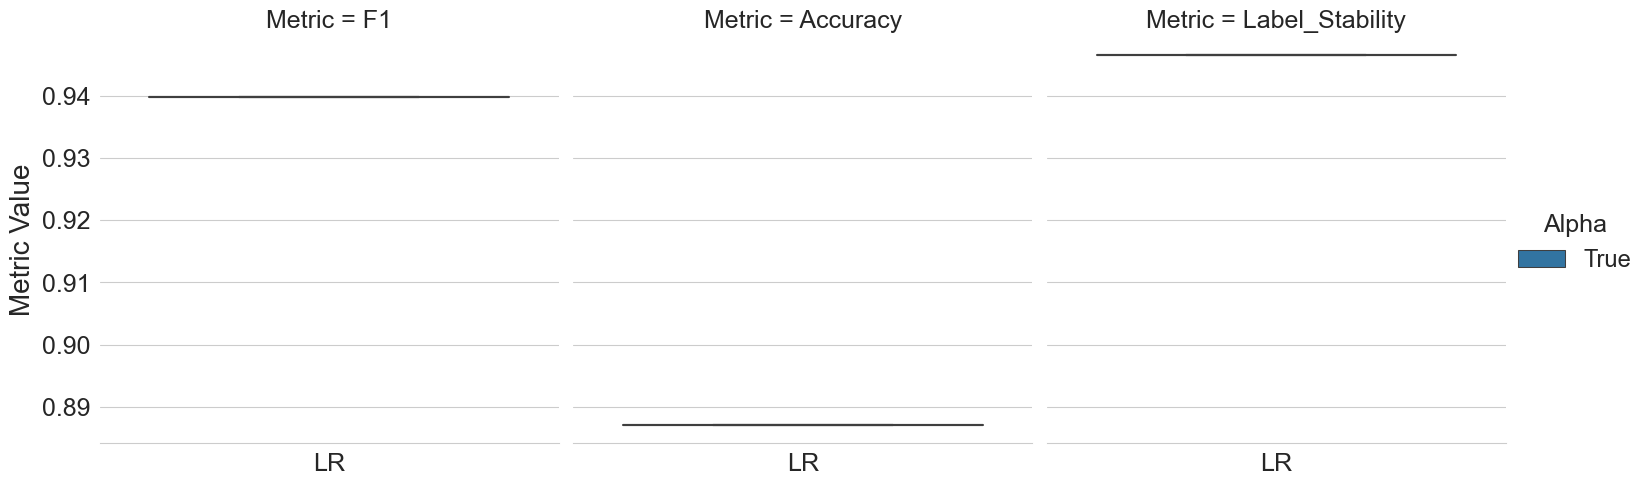

In [25]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           # ylim=(0.75, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

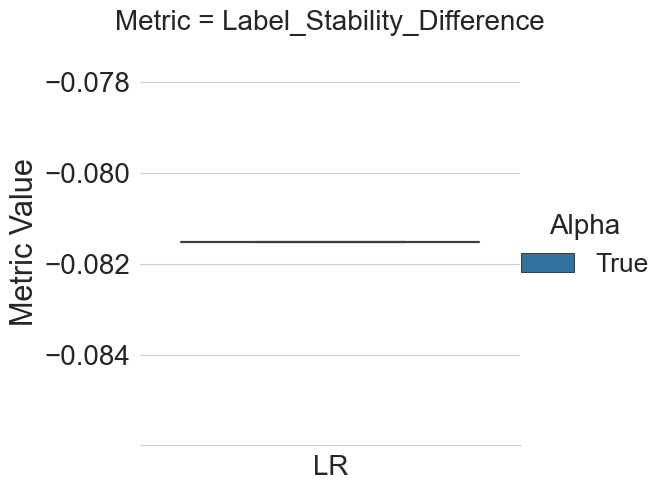

In [26]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Label_Stability_Difference'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

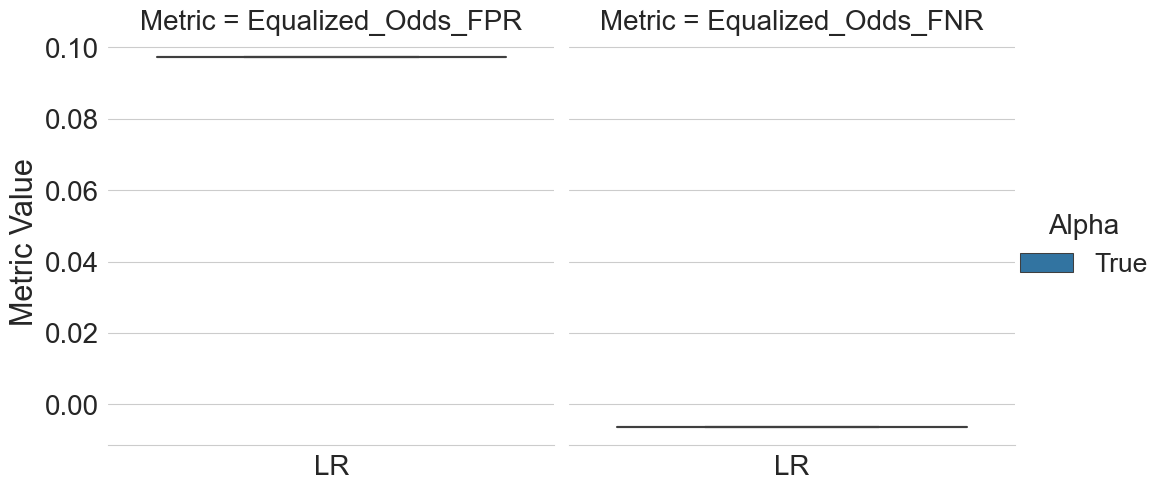

In [27]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

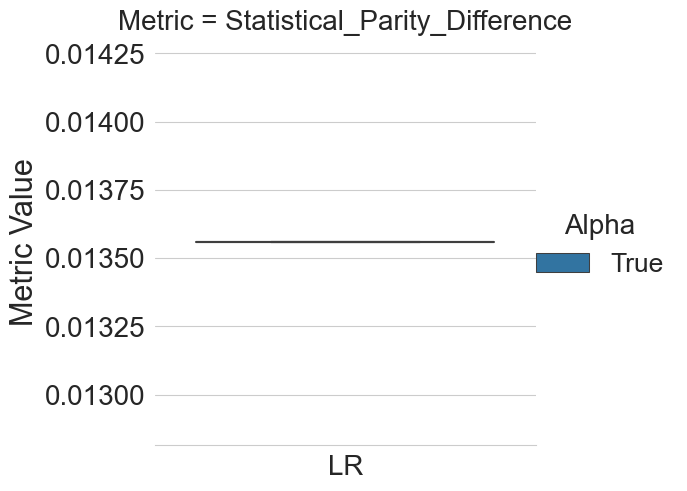

In [28]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Statistical_Parity_Difference'],
                                           vals_to_replace=vals_to_replace)